In [1]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

![GAP explanation](./photo_2023-03-13_10-57-26.jpg)

In [2]:
CASE=1
if CASE==0: dname="DATA"
if CASE==1: dname="DATA_b"

fname = dname+'/x_RBM_q0.1.dat'

# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ", dtype=int)

# store in v0, because later we will shuffle v
v0 = np.copy(v)

# to start, take a small subsample
#v = v[1:11]
N = len(v)
L = len(v[1])

SPINS = True
#SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12, N)):
    if SPINS: print(v0[i], "\n->", v[i])
    else: print(v[i])
print('...')

each of N=10000 data has L=20 digits
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0] 
-> [-1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] 
-> [-1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1]
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1] 
-> [-1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1]
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0] 
-> [-1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1]
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0] 
-> [-1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1]
[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0] 
-> [-1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1]
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0] 
-> [-1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] 
-> [-1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1]
[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0] 
-> [ 1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -

![For the ex](./photo_2023-03-13_11-55-40.jpg)

## Initialize

In [3]:
# RBM, nr of hidden variables
if CASE==0: M = 3
if CASE==1: M = 6

# range of each initial weight
sigma = sqrt(4. / float(L + M)) 

# random seed for reproducibility
np.random.seed(12345)

# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L, M)
a = sigma * np.random.randn(L) #bias
b = np.zeros(M)

print("w=", w); print("a=", a); print("b=", b)

w0, a0, b0 = np.copy(w), np.copy(a), np.copy(b)

w= [[-8.02929500e-02  1.87857033e-01 -2.03740626e-01 -2.17975359e-01
   7.71042577e-01  5.46538733e-01]
 [ 3.64414674e-02  1.10509933e-01  3.01635468e-01  4.88891926e-01
   3.95052168e-01 -5.08419748e-01]
 [ 1.07860593e-01  8.97870182e-02  5.30657642e-01  3.47686193e-01
  -7.85106746e-01 -1.45848643e-01]
 [ 6.54645586e-01 -1.72021203e-01 -2.11704013e-01  1.87088914e-01
   1.27434065e+00 -4.00558390e-01]
 [-2.26352263e-01  4.86843697e-02  1.18694804e-01  2.05440307e-01
   3.68807287e-04  5.27085566e-01]
 [-2.79874977e-01 -3.26005239e-01 -9.29681343e-01 -7.29850429e-01
  -3.37616829e-01  2.19707060e-01]
 [-4.96540360e-01  4.70000651e-02 -4.17143902e-01  1.30567343e-01
  -9.25440195e-01 -7.82671864e-02]
 [-6.04820407e-01 -3.80753951e-01 -5.12659443e-01  1.12315611e-01
   1.48257566e-01 -2.95698627e-01]
 [ 1.29940923e-01  5.29412453e-01  2.74078923e-02  9.67535462e-02
  -4.65250272e-03  3.94119531e-01]
 [ 5.20568556e-01 -3.60564048e-01 -6.07609535e-01  8.70151550e-03
   2.97454498e-01 -2.5

## Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]


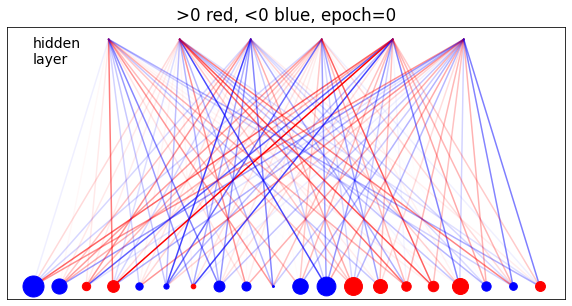

In [4]:
def create_coord(np, x0, f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1, y1) = create_coord(L, 0)
(x2, y2) = create_coord(M, 1, f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i], x2[j]), (y1[i], y2[j]), mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.tick_params(left=False, bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(), -w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i], y2[j]), (x1[i], x2[j]), mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i], x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300, A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

![Potitive/negative](./photo_2023-03-13_11-06-48.jpg)

In [5]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in, wei, bias, DE, info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    # initial vector
    v_out = np.full(n, vmin, dtype=int) # a list of -1's or 0's 
    # when the prob is good it flips the -1 to 1
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 0
activate(v[k], w, b, GAP, info=True)

input= [-1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1]
act= [-0.55363703  1.08935447  3.20797777  0.05050731 -0.65476091 -0.30478319]
prob= [0.24837944 0.89832121 0.99836741 0.5252322  0.21256687 0.35215812]
output= [-1  1  1  1 -1 -1]


array([-1,  1,  1,  1, -1, -1])

## RBM train


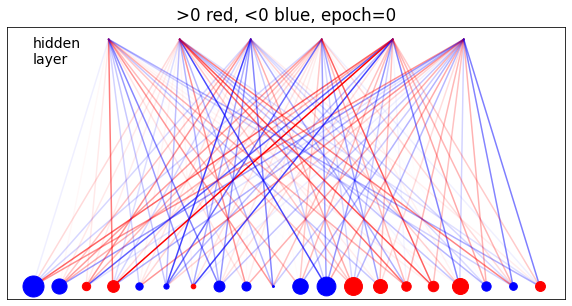

NameError: name 'hf' is not defined

In [7]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate
l_rate = 1.0

# minibatch
mini, m = 150, 0

# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N): # k n° of the sample
        if m==0: # 0 to mini-1
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L), np.zeros(L)
            h_data, h_model = np.zeros(M), np.zeros(M)
            vh_data, vh_model= np.zeros((L, M)), np.zeros((L, M))

        # positive CD-1 phase: generating h 
        h = activate(v[k], w, b, GAP)
        # negative CD phase: generating fantasy vf
        vf = activate(h, w.T, a, GAP) # remember to change h->hf in the for loop, in the ex
        # one more positive CD phase: generating fantasy hf from fantasy vf 
        hf = activate(vf, w, b, GAP)
        # accumulate stats
        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T, h)
        vh_model+= np.outer(vf.T, hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a "vanilla" SGD
            dw = l_rate_m*(vh_data - vh_model) # ()-> direction of the grad we have to follow, dw is the step in the grad dir
            da = l_rate_m*(v_data - v_model)
            db = l_rate_m*(h_data - h_model)
            if epoch<=1 and k<=mini:
                print('----------- epoch =', epoch, '  k=', k, '  m=', m)
                print('dw =', dw)
                print('da =', da)
                print('db =', db)
            # basic step of vanilla gradient descent, from eq.(211)
            w = w + dw
            a = a + da
            b = b + db
            m=0
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ', l_rate)

In [58]:
print('w0=', w0); print('a0=', a0); print('b0=', b0)
print('w=', w); print('a=', a); print('b=', b)

w0= [[-8.02929500e-02  1.87857033e-01 -2.03740626e-01 -2.17975359e-01
   7.71042577e-01  5.46538733e-01]
 [ 3.64414674e-02  1.10509933e-01  3.01635468e-01  4.88891926e-01
   3.95052168e-01 -5.08419748e-01]
 [ 1.07860593e-01  8.97870182e-02  5.30657642e-01  3.47686193e-01
  -7.85106746e-01 -1.45848643e-01]
 [ 6.54645586e-01 -1.72021203e-01 -2.11704013e-01  1.87088914e-01
   1.27434065e+00 -4.00558390e-01]
 [-2.26352263e-01  4.86843697e-02  1.18694804e-01  2.05440307e-01
   3.68807287e-04  5.27085566e-01]
 [-2.79874977e-01 -3.26005239e-01 -9.29681343e-01 -7.29850429e-01
  -3.37616829e-01  2.19707060e-01]
 [-4.96540360e-01  4.70000651e-02 -4.17143902e-01  1.30567343e-01
  -9.25440195e-01 -7.82671864e-02]
 [-6.04820407e-01 -3.80753951e-01 -5.12659443e-01  1.12315611e-01
   1.48257566e-01 -2.95698627e-01]
 [ 1.29940923e-01  5.29412453e-01  2.74078923e-02  9.67535462e-02
  -4.65250272e-03  3.94119531e-01]
 [ 5.20568556e-01 -3.60564048e-01 -6.07609535e-01  8.70151550e-03
   2.97454498e-01 -2.

## Test: noise reduction

In [59]:
from IPython.display import display_html 
import pandas as pd

ampl = 40. # beta

# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k], w, b, ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = activate(h, w.T, a, ampl*GAP)
# difference between fantasy and data
diff = (v1 - v0)/2
str0 = fname+'_M'+str(M)+'-mini'+str(mini)
np.savetxt(str0+".fantasy", (v1+1)/2, fmt='%d', delimiter=' ')  
np.savetxt(str0+'.diff', diff, fmt='%d', delimiter=' ')  


def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

C:\Users\gabri\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
4,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
5,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
6,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
7,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
8,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
9,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [5]:
energies = []
import numpy as np
for i in range(4):
    energy_vec = np.zeros((1, 4))
    energy_vec[:, i] = 1
    energies.append(energy_vec)
    #return energy_vec

In [7]:
print(energies)

[array([[1., 0., 0., 0.]]), array([[0., 1., 0., 0.]]), array([[0., 0., 1., 0.]]), array([[0., 0., 0., 1.]])]


In [10]:
a = np.dot([2,3,4,5], energies[2].T)
print(a)

[4.]


In [11]:
en = [1,2,3,4]
cumsum = np.sum(en)
print(cumsum)

10
